In [47]:
!git clone https://github.com/kimlolipop/Data_set.git

Cloning into 'Data_set'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 11 (delta 0), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [48]:
!unzip /content/Data_set/Data_set.zip

Archive:  /content/Data_set/Data_set.zip
  inflating: Online Retail.csv       
  inflating: Supermarket Data.csv    


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('Supermarket Data.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956574 entries, 0 to 956573
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 956574 non-null  int64  
 1   SHOP_DATE                 956574 non-null  int64  
 2   SHOP_WEEKDAY              956574 non-null  int64  
 3   SHOP_HOUR                 956574 non-null  int64  
 4   QUANTITY                  956574 non-null  int64  
 5   SPEND                     956574 non-null  float64
 6   PROD_CODE                 956574 non-null  object 
 7   PROD_CODE_10              956574 non-null  object 
 8   PROD_CODE_20              956574 non-null  object 
 9   PROD_CODE_30              956574 non-null  object 
 10  PROD_CODE_40              956574 non-null  object 
 11  CUST_CODE                 802892 non-null  object 
 12  CUST_PRICE_SENSITIVITY    802892 non-null  object 
 13  CUST_LIFESTAGE            697259 non-null  o

In [52]:
df['DateTime'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df['month'] = df['DateTime'].apply(lambda x : x.replace(day=1))

# df.loc[df['SHOP_WEEKDAY'] == 1, 'day'] = 'Sun'
# df.loc[df['SHOP_WEEKDAY'] == 2, 'day'] = 'Mon'  
# df.loc[df['SHOP_WEEKDAY'] == 3, 'day'] = 'Tu'  
# df.loc[df['SHOP_WEEKDAY'] == 4, 'day'] = 'Wed'  
# df.loc[df['SHOP_WEEKDAY'] == 5, 'day'] = 'Th'  
# df.loc[df['SHOP_WEEKDAY'] == 6, 'day'] = 'Fri'  
# df.loc[df['SHOP_WEEKDAY'] == 7, 'day'] = 'Sat' 

In [53]:
df.head(10)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,DateTime,month
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02,2007-10-05,2007-10-01
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02,2007-10-10,2007-10-01
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02,2007-12-09,2007-12-01
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02,2007-09-29,2007-09-01
4,200737,20071110,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02,2007-11-10,2007-11-01
5,200746,20080108,3,15,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000556927,MM,NaN,994109200504187,L,MM,Top Up,Fresh,STORE00001,LS,E02,2008-01-08,2008-01-01
6,200731,20070929,7,18,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237810,L,MM,Full Shop,Fresh,STORE00001,LS,E02,2007-09-29,2007-09-01
7,200732,20071004,5,21,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000128681,UM,YF,994107800252439,M,UM,Small Shop,Fresh,STORE00001,LS,E02,2007-10-04,2007-10-01
8,200738,20071116,6,18,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000961918,MM,OT,994108400798165,L,UM,Top Up,Fresh,STORE00001,LS,E02,2007-11-16,2007-11-01
9,200738,20071115,5,15,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000961918,MM,OT,994108400798164,L,MM,Full Shop,Fresh,STORE00001,LS,E02,2007-11-15,2007-11-01


In [54]:
df.columns

Index(['SHOP_WEEK', 'SHOP_DATE', 'SHOP_WEEKDAY', 'SHOP_HOUR', 'QUANTITY',
       'SPEND', 'PROD_CODE', 'PROD_CODE_10', 'PROD_CODE_20', 'PROD_CODE_30',
       'PROD_CODE_40', 'CUST_CODE', 'CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE',
       'BASKET_ID', 'BASKET_SIZE', 'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE',
       'BASKET_DOMINANT_MISSION', 'STORE_CODE', 'STORE_FORMAT', 'STORE_REGION',
       'DateTime', 'month'],
      dtype='object')

In [55]:
df = df[['DateTime', 'month','SHOP_WEEKDAY', 'SHOP_HOUR', 'QUANTITY',
       'SPEND', 'PROD_CODE', 'PROD_CODE_10', 'PROD_CODE_20', 'PROD_CODE_30',
       'PROD_CODE_40', 'CUST_CODE', 'CUST_PRICE_SENSITIVITY', 'CUST_LIFESTAGE',
       'BASKET_ID', 'BASKET_SIZE', 'BASKET_PRICE_SENSITIVITY', 'BASKET_TYPE',
       'BASKET_DOMINANT_MISSION', 'STORE_CODE', 'STORE_FORMAT', 'STORE_REGION']]

# Prepare data 




In [56]:
# df[df['SHOP_HOUR'] == 23]
MAT_TY = df[( (df['month']<='2008-07-01') & (df['month']>='2007-08-01'))].reset_index()
MAT_LY = df[( (df['month']<='2007-07-01') & (df['month']>='2006-08-01'))].reset_index()
min(MAT_LY['month'])

Timestamp('2006-08-01 00:00:00')

In [57]:
YTD = df[(df['month']>='2007-01-01')].reset_index()
sum_YTD = sum(YTD['SPEND'])


summary_YTD = pd.DataFrame(np.array([[sum_YTD]]),
                   columns=['YTD'])


summary_YTD

,YTD
0,1210049.87


In [58]:
summary_YTD['YTD'][0]

1210049.870000284

In [59]:
# sale compare mat_ty vs mat_ly
sale_mat_ty = MAT_TY[['SPEND', 'PROD_CODE']]
sale_mat_ty = sale_mat_ty.groupby(by = ['PROD_CODE']).agg({'SPEND' : 'sum'
                                              }).reset_index() #agg nunique = count
sale_mat_ty.columns = ['PROD_CODE','SPEND_MAT_TY']

sale_mat_ly = MAT_LY[['SPEND', 'PROD_CODE']]
sale_mat_ly = sale_mat_ly.groupby(by = ['PROD_CODE']).agg({'SPEND' : 'sum'
                                              }).reset_index() #agg nunique = count
sale_mat_ly.columns = ['PROD_CODE','SPEND_MAT_LY']

# sale_mat_ly

In [60]:
sale_LY_TY = pd.merge(sale_mat_ly, sale_mat_ty, on="PROD_CODE", how='outer')
sale_LY_TY['SPEND_MAT_LY'].fillna(0, inplace = True)
sale_LY_TY['SPEND_MAT_TY'].fillna(0, inplace = True)

sale_LY_TY.loc[sale_LY_TY['SPEND_MAT_TY'] >= sale_LY_TY['SPEND_MAT_LY'], 'status'] = 'Good'
sale_LY_TY.loc[sale_LY_TY['SPEND_MAT_TY'] < sale_LY_TY['SPEND_MAT_LY'], 'status'] = 'Bad'
sale_LY_TY

,PROD_CODE,SPEND_MAT_LY,SPEND_MAT_TY,status
0,PRD0900002,54.72,88.16,Good
1,PRD0900003,13.68,19.38,Good
2,PRD0900004,47.60,27.20,Bad
3,PRD0900005,181.80,34.34,Bad
4,PRD0900006,62.70,42.24,Bad
...,...,...,...,...
4952,PRD0904864,0.00,26.01,Good
4953,PRD0904944,0.00,15.40,Good
4954,PRD0904948,0.00,87.78,Good
4955,PRD0904959,0.00,363.54,Good


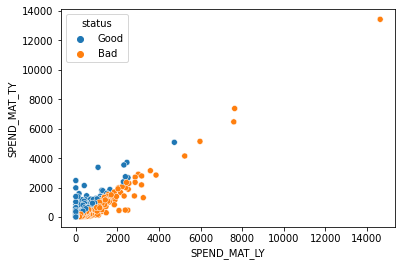

In [61]:
sns.scatterplot(data=sale_LY_TY, x="SPEND_MAT_LY", y="SPEND_MAT_TY", hue="status")

In [62]:
df1 = df[(df['STORE_CODE']=='STORE00001')].reset_index()
df2 = df[(df['STORE_CODE']=='STORE00002')].reset_index()

sale_sku1 = df1[['PROD_CODE','SPEND']]
sale_sku1 = sale_sku1.groupby(by = 'PROD_CODE').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)

sale_sku1_10 = df1[['PROD_CODE_10','SPEND']]
sale_sku1_10 = sale_sku1_10.groupby(by = 'PROD_CODE_10').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)

sale_sku1_20 = df1[['PROD_CODE_20','SPEND']]
sale_sku1_20 = sale_sku1_20.groupby(by = 'PROD_CODE_20').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)

sale_sku1_30 = df1[['PROD_CODE_30','SPEND']]
sale_sku1_30 = sale_sku1_30.groupby(by = 'PROD_CODE_30').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)

sale_sku1_40 = df1[['PROD_CODE_40','SPEND']]
sale_sku1_40 = sale_sku1_40.groupby(by = 'PROD_CODE_40').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)   



In [63]:
sale_sku2 = df2[['PROD_CODE','SPEND']]
sale_sku2 = sale_sku2.groupby(by = 'PROD_CODE').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)

sale_sku2_10 = df2[['PROD_CODE_10','SPEND']]
sale_sku2_10 = sale_sku2_10.groupby(by = 'PROD_CODE_10').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)

sale_sku2_20 = df2[['PROD_CODE_20','SPEND']]
sale_sku2_20 = sale_sku2_20.groupby(by = 'PROD_CODE_20').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)

sale_sku2_30 = df2[['PROD_CODE_30','SPEND']]
sale_sku2_30 = sale_sku2_30.groupby(by = 'PROD_CODE_30').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)

sale_sku2_40 = df2[['PROD_CODE_40','SPEND']]
sale_sku2_40 = sale_sku2_40.groupby(by = 'PROD_CODE_40').agg({'SPEND' : 'sum'})\
                        .reset_index()\
                        .sort_values(by='SPEND', ascending=False)\
                        .head(5)   

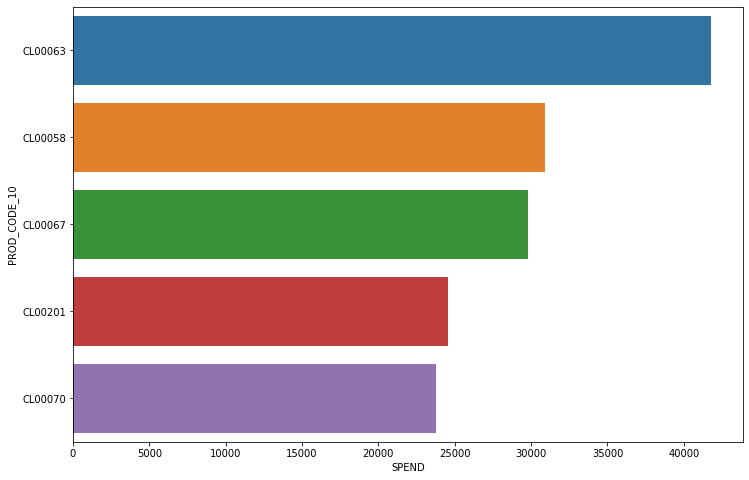

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(y = 'PROD_CODE_10', x='SPEND', data = sale_sku1_10)


In [65]:
# hour/day spent
hour_day_spend = df[['SHOP_HOUR','SHOP_WEEKDAY','BASKET_ID']]
hour_day_spend = hour_day_spend.pivot_table(index="SHOP_WEEKDAY",columns="SHOP_HOUR",values="BASKET_ID", aggfunc="nunique")


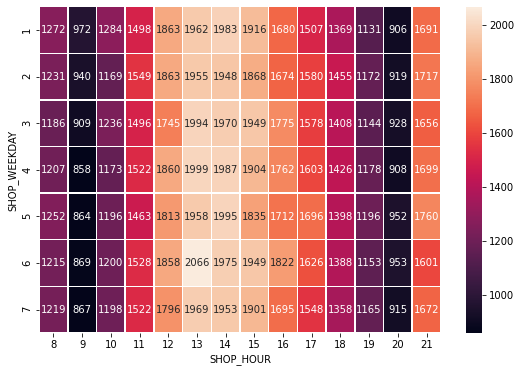

In [66]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(hour_day_spend, annot=True, fmt="d", linewidths=.5, ax=ax)

In [67]:
monthly_sales = df[['month','QUANTITY','SPEND','BASKET_ID',]]
monthly_sales = df.groupby(by = 'month').agg({'QUANTITY' : 'sum',
                                              'SPEND' : 'sum',
                                              'BASKET_ID' : 'nunique'}) #agg nunique = count
monthly_sales.reset_index(inplace=True)


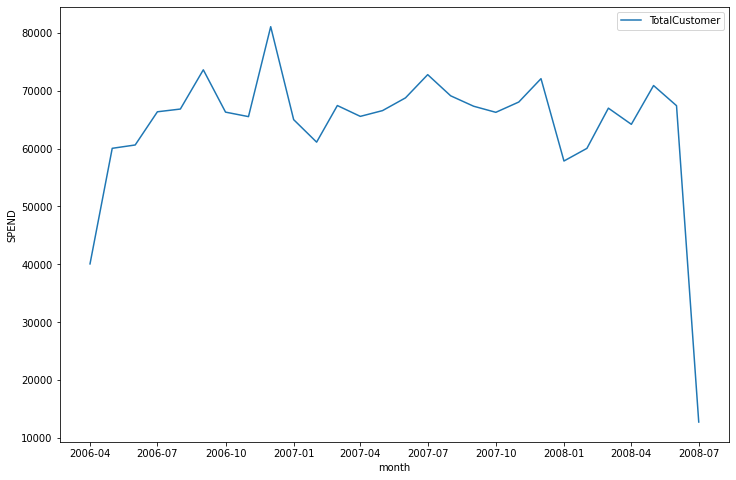

In [68]:
plt.figure(figsize=(12,8))
sns.lineplot(x = 'month', y = 'SPEND', data = monthly_sales, label = 'TotalCustomer')
# plt.figure(figsize=(12,8))
# sns.lineplot(x = 'month', y = 'BASKET_ID', data = monthly_sales, label = 'TotalCustomer')

# Dash board

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


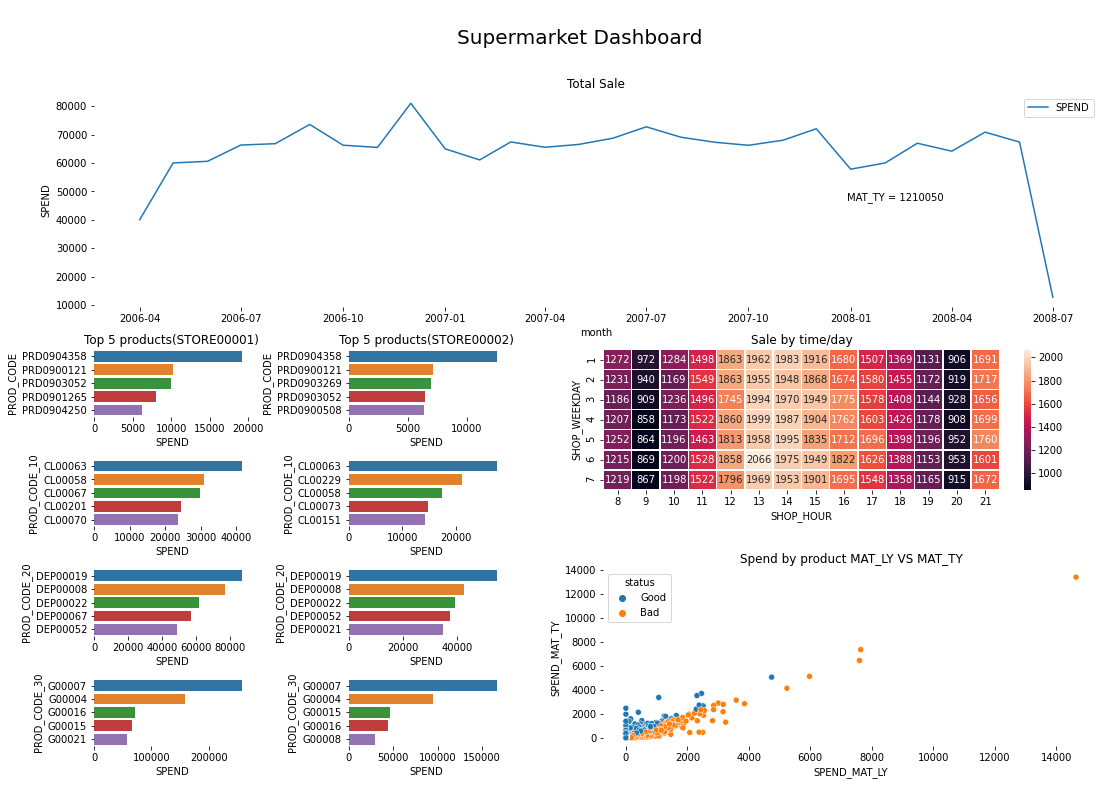

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 2, figsize=(18,12))
ax1 = plt.subplot2grid((18, 12), (0, 0), rowspan=6, colspan=12) 

#L
ax2 = plt.subplot2grid((18, 12), (7, 0), rowspan=2, colspan=2) 
ax4 = plt.subplot2grid((18, 12), (10, 0), rowspan=2, colspan=2)
ax6 = plt.subplot2grid((18, 12), (13, 0), rowspan=2, colspan=2) 
ax7 = plt.subplot2grid((18, 12), (16, 0), rowspan=2, colspan=2)


ax8 = plt.subplot2grid((18, 12), (7, 3), rowspan=2, colspan=2) 
ax9 = plt.subplot2grid((18, 12), (10, 3), rowspan=2, colspan=2)
ax10 = plt.subplot2grid((18, 12), (13, 3), rowspan=2, colspan=2) 
ax11 = plt.subplot2grid((18, 12), (16, 3), rowspan=2, colspan=2)


#R
ax3 = plt.subplot2grid((18, 12), (7, 6), rowspan=4, colspan=6)
ax5 = plt.subplot2grid((18, 12), (13, 6), rowspan=5, colspan=6)


# Total sale
sns.lineplot(x = 'month', y = 'SPEND', data = monthly_sales, label = 'SPEND', ax = ax1)
ax1.text(0.75, 0.5,'MAT_TY = ' + str(round(summary_YTD['YTD'][0])), transform=ax1.transAxes)

# Sale code per store
#L
sns.barplot(y = 'PROD_CODE', x='SPEND', data = sale_sku1, ax = ax2)
sns.barplot(y = 'PROD_CODE_10', x='SPEND', data = sale_sku1_10, ax = ax4)
sns.barplot(y = 'PROD_CODE_20', x='SPEND', data = sale_sku1_20, ax = ax6)
sns.barplot(y = 'PROD_CODE_30', x='SPEND', data = sale_sku1_30, ax = ax7)
#R
sns.barplot(y = 'PROD_CODE', x='SPEND', data = sale_sku2, ax = ax8)
sns.barplot(y = 'PROD_CODE_10', x='SPEND', data = sale_sku2_10, ax = ax9)
sns.barplot(y = 'PROD_CODE_20', x='SPEND', data = sale_sku2_20, ax = ax10)
sns.barplot(y = 'PROD_CODE_30', x='SPEND', data = sale_sku2_30, ax = ax11)

# sale per hour/day
sns.heatmap(hour_day_spend, annot=True, fmt="d", linewidths=.5, ax= ax3)
# MAT_TY VS MAT_LY
sns.scatterplot(data=sale_LY_TY, x="SPEND_MAT_LY", y="SPEND_MAT_TY", hue="status", ax= ax5)

# 
ax1.set_title('Total Sale')
ax2.set_title('Top 5 products(STORE00001)')
ax8.set_title('Top 5 products(STORE00002)')
ax3.set_title('Sale by time/day')
ax5.set_title('Spend by product MAT_LY VS MAT_TY')



plt.tight_layout(pad=3.0)
fig.suptitle('\nSupermarket Dashboard', fontsize=20)
fig.subplots_adjust(top=0.88)
sns.despine(bottom = True, left = True)

plt.show()


In [ ]:
|